In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from keras.models import load_model
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
df=pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.shape


(5572, 2)

In [8]:
df.Category.value_counts()


ham     4825
spam     747
Name: Category, dtype: int64

In [9]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [10]:
df.duplicated().sum()

415

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.shape

(5157, 2)

In [13]:
words=[]

for i in df["Message"]:
    i=i.lower()
    i=re.sub("[^a-z0-9 ]","",i) #removing everything except space and a-z
    words.append(i)

In [14]:
df["message"]=words

In [15]:
df.head()

,Category,Message,message
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [17]:
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])


In [18]:
df.head()


,Category,Message,message
0,0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,0,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [19]:
tfv=TfidfVectorizer()

In [20]:
x=tfv.fit_transform(df["message"]).toarray() #need to convert it to numpy array
y=df['Category']

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.75)

In [22]:
nn=Sequential()

#1st hidden layer
nn.add(Dense(128,input_dim=xtrain.shape[1],activation='relu'))
nn.add(Dropout(0.3))
nn.add(BatchNormalization())

#2nd hidden layer
nn.add(Dense(64,activation='relu'))
nn.add(Dropout(0.3))
nn.add(BatchNormalization())

#3rd hidden layer
nn.add(Dense(32,activation='relu'))
nn.add(Dropout(0.3))
nn.add(BatchNormalization())

#o/p layer
nn.add(Dense(1,activation='sigmoid'))

In [23]:
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1221120   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                        

In [24]:
early_stop=EarlyStopping(monitor='val_loss',patience=5)


In [25]:
nn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [26]:
hist=nn.fit(xtrain,ytrain,callbacks=early_stop,epochs=100,validation_split=0.2,batch_size=10)

Epoch 1/100
310/310 [==============================] - 13s 27ms/step - loss: 0.5069 - accuracy: 0.7501 - val_loss: 0.3134 - val_accuracy: 0.8656
Epoch 2/100
310/310 [==============================] - 8s 27ms/step - loss: 0.2145 - accuracy: 0.9269 - val_loss: 0.1379 - val_accuracy: 0.9535
Epoch 3/100
310/310 [==============================] - 8s 27ms/step - loss: 0.1343 - accuracy: 0.9544 - val_loss: 0.1484 - val_accuracy: 0.9587
Epoch 4/100
310/310 [==============================] - 10s 31ms/step - loss: 0.1130 - accuracy: 0.9593 - val_loss: 0.1580 - val_accuracy: 0.9587
Epoch 5/100
310/310 [==============================] - 10s 31ms/step - loss: 0.0932 - accuracy: 0.9644 - val_loss: 0.1637 - val_accuracy: 0.9587
Epoch 6/100
310/310 [==============================] - 8s 25ms/step - loss: 0.0764 - accuracy: 0.9758 - val_loss: 0.1630 - val_accuracy: 0.9612
Epoch 7/100
310/310 [==============================] - 8s 25ms/step - loss: 0.0615 - accuracy: 0.9806 - val_loss: 0.1620 - val_accura

In [27]:
nn.evaluate(xtrain,ytrain)

121/121 [==============================] - 1s 4ms/step - loss: 0.0351 - accuracy: 0.9928


[0.03506997600197792, 0.9927592277526855]

In [28]:
nn.evaluate(xtest,ytest)

41/41 [==============================] - 0s 6ms/step - loss: 0.1139 - accuracy: 0.9713


[0.11388456076383591, 0.9713178277015686]

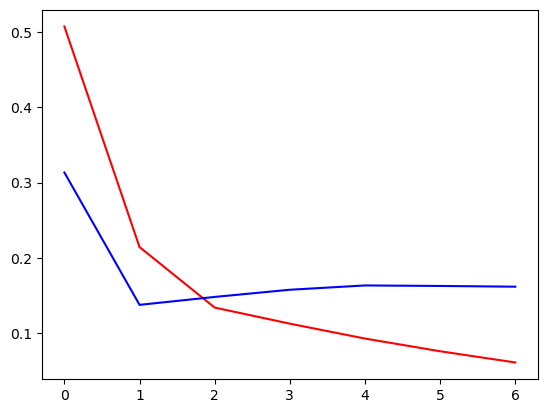

In [29]:
plt.plot(hist.history['loss'],c='red')
plt.plot(hist.history['val_loss'],c='blue')


In [30]:
y_pred_prob=nn.predict(xtest) #return probability
y_pred=[]

for i in y_pred_prob:
    if i>=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

41/41 [==============================] - 0s 5ms/step


In [31]:
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1133
           1       0.99      0.77      0.87       157

    accuracy                           0.97      1290
   macro avg       0.98      0.88      0.93      1290
weighted avg       0.97      0.97      0.97      1290



<AxesSubplot:>

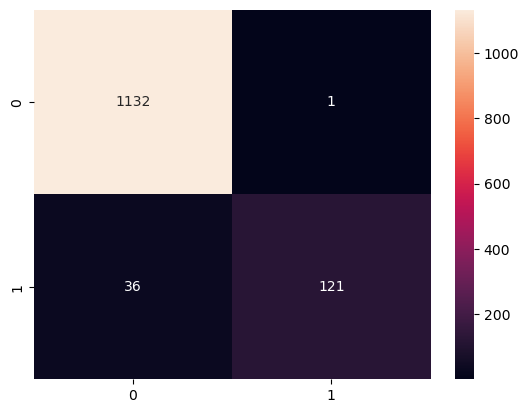

In [32]:
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True,fmt='d')

In [33]:
nn.save("email_detection.h5") # saving model for future use

In [34]:
def detect(model,string):
    string=string.lower()
    string=re.sub("[^a-z ]","",string)
    x=tfv.transform([string]).toarray()
    y=model.predict(x)
    print(y)
    if y>=0.5:
        print("This is spam mail")
    else:
        print("This is ham mail")
        
email_model=load_model("email_detection.h5")

In [35]:
message="How to win cash price!! click on below link and redeem it."

In [36]:
detect(email_model,message)


1/1 [==============================] - 0s 169ms/step
[[0.6201245]]
This is spam mail


In [37]:
message='Congratulation!!!! You won a prize of $10000.'

In [38]:
detect(email_model,message)

1/1 [==============================] - 0s 57ms/step
[[0.96444005]]
This is spam mail


In [39]:
message="Need last month reports"

In [40]:
detect(email_model,message)

1/1 [==============================] - 0s 59ms/step
[[0.0009394]]
This is ham mail
